# Estadisticas de los datos recogidos por el Punto de Venta

### Configuración inicial...

In [1]:
import pandas as pd
import fdb
import datetime
from get_prov import get_prov

con = fdb.connect(dsn="localhost:C:/Users/casa/Desktop/DB-Helper/PDVDATA.FDB", user='SYSDBA', password='masterkey')
cur = con.cursor()
prov_info = get_prov()
prov = {v: k for k, v in prov_info['data'].items()}


## Enero:

In [3]:
vts_jan = pd.DataFrame(columns=['GANANCIA', 'DEPT', 'DATE', 'PRICE'])
arts_day = []
for j in range(31):
    cur.execute("SELECT * FROM VENTATICKETS_ARTICULOS WHERE PAGADO_EN >= ? AND PAGADO_EN < ?;", (datetime.datetime(2023,1,j+1), datetime.datetime(2023,1 if j+2 < 32 else 2, j+2 if (j+2 < 32) else 1)))
    for i in range(2000):
        try:
            x = cur.fetchone()
            if not x:
                arts_day.append(i)
                break
            vts_jan.loc[len(vts_jan)] = [x[5], prov[x[6]], x[7], x[13]]
        except:
            print(f'error in index: {i}')
            cur.execute("SELECT PRODUCTO_CODIGO, PAGADO_EN FROM VENTATICKETS_ARTICULOS WHERE PAGADO_EN >= ? AND PAGADO_EN < ?;", (datetime.datetime(2023,1,j+1), datetime.datetime(2023,1 if j+2 < 32 else 2, j+2 if (j+2 < 32) else 1)))
            x = cur.fetchone()
            print('error code ----> ', x)
            continue
vts_jan

error in index: 15
error code ---->  ('7501031310258', datetime.datetime(2023, 1, 1, 11, 3, 17))
error in index: 16
error code ---->  ('7501031310258', datetime.datetime(2023, 1, 1, 11, 3, 17))
error in index: 17
error code ---->  ('7501031310258', datetime.datetime(2023, 1, 1, 11, 3, 17))
error in index: 18
error code ---->  ('7501031310258', datetime.datetime(2023, 1, 1, 11, 3, 17))
error in index: 19
error code ---->  ('7501031310258', datetime.datetime(2023, 1, 1, 11, 3, 17))
error in index: 20
error code ---->  ('7501031310258', datetime.datetime(2023, 1, 1, 11, 3, 17))
error in index: 21
error code ---->  ('7501031310258', datetime.datetime(2023, 1, 1, 11, 3, 17))
error in index: 22
error code ---->  ('7501031310258', datetime.datetime(2023, 1, 1, 11, 3, 17))
error in index: 23


KeyboardInterrupt: 

In [47]:
mask = vts_jan['DEPT'].isin([-1])
masked = vts_jan[~mask]

In [48]:
dept_bruta = masked.groupby('DEPT')['PRICE'].sum()
dept_bruta.sort_values(ascending=False).head(10)

DEPT
Coca-Cola       38678.0
Verdura         38251.5
Varios          35115.0
Pepsi           34062.0
Treviño         23414.0
Lala            16234.0
Sabritas        14415.5
Marlboro        12963.0
Sigma            8674.0
Bimbo Blanco     7707.0
Name: PRICE, dtype: float64

In [49]:
dept_bruta = masked.groupby('DEPT')['GANANCIA'].sum()
dept_bruta.sort_values(ascending=False).head(10)

DEPT
Varios                  10698.799995
Verdura                 10475.500000
Coca-Cola                9975.375000
Treviño                  6887.328409
- Sin Departamento -     6607.500000
Pepsi                    5259.462981
Sabritas                 3418.590775
Lala                     2698.000001
Sigma                    2057.067997
Bimbo Blanco             1623.140000
Name: GANANCIA, dtype: float64

In [50]:
masked['PRICE'].sum()

283060.69999980927

In [51]:
masked['GANANCIA'].sum()

74575.68274253607

In [54]:
masked['GANANCIA'].idxmax()
masked.loc[10861]

GANANCIA                    90.0
DEPT        - Sin Departamento -
DATE         2023-01-30 21:29:00
PRICE                       90.0
Name: 10861, dtype: object

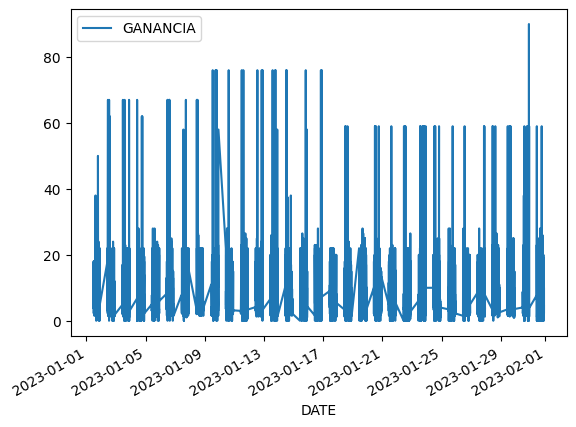

In [52]:
jan_income = masked.plot(x='DATE', y='GANANCIA')

### Extras...

In [7]:
# Mapa de las columnas...
cur.execute("SELECT * FROM VENTATICKETS;")
x = cur.fetchonemap()
print(x)
### -----> <result set row with ID = 10, FOLIO = 1, CAJA_ID = 1, CAJERO_ID = 7, NOMBRE = Ticket 1, CREADO_EN = 2012-06-09 16:49:17.575000, SUBTOTAL = 73.5, IMPUESTOS = 0.0, TOTAL = 73.5, GANANCIA = 73.5, ESTA_ABIERTO = f, CLIENTE_ID = None, VENDIDO_EN = 2012-06-09 16:53:42, ES_MODIFICABLE = t, PAGO_CON = 73.5, MONEDA = MXN, NUMERO_ARTICULOS = 7, PAGADO_EN = 2012-06-09 16:53:42, ESTA_CANCELADO = f, OPERACION_ID = 6, OLD_TICKET_ID = None, NOTAS = b'', IMPRIMIR_NOTA = t, FORMA_PAGO = e         , REFERENCIA = , FACTURA_ID = None, TOTAL_DEVUELTO = 0.0, TOTAL_AHORRADO = 0.0, TURNO_ID = None>

<result set row with ID = 10, FOLIO = 1, CAJA_ID = 1, CAJERO_ID = 7, NOMBRE = Ticket 1, CREADO_EN = 2012-06-09 16:49:17.575000, SUBTOTAL = 73.5, IMPUESTOS = 0.0, TOTAL = 73.5, GANANCIA = 73.5, ESTA_ABIERTO = f, CLIENTE_ID = None, VENDIDO_EN = 2012-06-09 16:53:42, ES_MODIFICABLE = t, PAGO_CON = 73.5, MONEDA = MXN, NUMERO_ARTICULOS = 7, PAGADO_EN = 2012-06-09 16:53:42, ESTA_CANCELADO = f, OPERACION_ID = 6, OLD_TICKET_ID = None, NOTAS = b'', IMPRIMIR_NOTA = t, FORMA_PAGO = e         , REFERENCIA = , FACTURA_ID = None, TOTAL_DEVUELTO = 0.0, TOTAL_AHORRADO = 0.0, TURNO_ID = None>


In [7]:
# Mapa de las columnas...
cur.execute("SELECT * FROM VENTATICKETS_ARTICULOS;")
x = cur.fetchonemap()
print(x)
### ----> <result set row with ID = 16, TICKET_ID = 11, PRODUCTO_CODIGO = T, PRODUCTO_NOMBRE = TRAPEADOR, CANTIDAD = 1.0, GANANCIA = 29.5, DEPARTAMENTO_ID = 2, PAGADO_EN = 2012-06-09 16:54:43, USA_MAYOREO = f, PORCENTAJE_DESCUENTO = 0.0, COMPONENTES = , IMPUESTOS_USADOS = , IMPUESTO_UNITARIO = 0.0, PRECIO_USADO = 29.5, CANTIDAD_DEVUELTA = 0.0, FUE_DEVUELTO = f, PORCENTAJE_PAGADO = 100>

<result set row with ID = 16, TICKET_ID = 11, PRODUCTO_CODIGO = T, PRODUCTO_NOMBRE = TRAPEADOR, CANTIDAD = 1.0, GANANCIA = 29.5, DEPARTAMENTO_ID = 2, PAGADO_EN = 2012-06-09 16:54:43, USA_MAYOREO = f, PORCENTAJE_DESCUENTO = 0.0, COMPONENTES = , IMPUESTOS_USADOS = , IMPUESTO_UNITARIO = 0.0, PRECIO_USADO = 29.5, CANTIDAD_DEVUELTA = 0.0, FUE_DEVUELTO = f, PORCENTAJE_PAGADO = 100>
